In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# New section

train = pd.read_csv('train.csv')
song_data = pd.read_csv('songs.csv')
user_data = pd.read_csv('members.csv')
song_extra = pd.read_csv('song_extra_info.csv')
df = pd.merge(train, song_data , on = 'song_id', how = 'left')
df = pd.merge(df , user_data, on = 'msno', how = 'left')
df = pd.merge(df , song_extra, on = 'song_id', how = 'left')
df.to_csv('Train_new.csv')

test = pd.read_csv('test.csv')
song_data = pd.read_csv('songs.csv')
user_data = pd.read_csv('members.csv')
song_extra = pd.read_csv('song_extra_info.csv')
df2 = pd.merge(test, song_data , on = 'song_id', how = 'left')
df2 = pd.merge(df2 , user_data, on = 'msno', how = 'left')
df2 = pd.merge(df2 , song_extra, on = 'song_id', how = 'left')
df2.to_csv('Test_new.csv')

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/My Drive/appliedai/assignments/music/combined.csv')

In [4]:
df_tr = pd.read_csv('Train_new.csv',parse_dates=['registration_init_time','expiration_date'])
df_tr.shape

(7377418, 21)

In [5]:
df_tr.columns

Index(['Unnamed: 0', 'msno', 'song_id', 'source_system_tab',
       'source_screen_name', 'source_type', 'target', 'song_length',
       'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'city',
       'bd', 'gender', 'registered_via', 'registration_init_time',
       'expiration_date', 'name', 'isrc'],
      dtype='object')

In [6]:
#df = df.drop(labels= 'Unnamed: 0', axis = 1)

In [7]:
df_te = pd.read_csv('Test_new.csv',parse_dates=['registration_init_time','expiration_date'])
df_te.shape

(2556790, 21)

In [8]:
df_te.columns

Index(['Unnamed: 0', 'id', 'msno', 'song_id', 'source_system_tab',
       'source_screen_name', 'source_type', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time', 'expiration_date',
       'name', 'isrc'],
      dtype='object')

In [9]:
df_tr = df_tr.drop(labels = 'Unnamed: 0', axis = 1)

In [10]:
df_te = df_te.drop(labels= ['Unnamed: 0', 'id'], axis = 1)
df_tr.shape, df_te.shape

((7377418, 20), (2556790, 19))

In [11]:
# checking for duplicates
df_tr[df_tr.duplicated(['msno','song_id'])]
# No duplicates

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc


In [12]:
df_te[df_te.duplicated(['msno','song_id'])]
# No dupilcates ti test data

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc


In [13]:
def change_type(df):
    df['city'] = df['city'].astype(np.int8)
    df['bd'] = df['bd'].astype(np.int16)
    df['registered_via'] = df['registered_via'].astype(np.int8)

In [14]:
change_type(df_tr)
change_type(df_te)

In [15]:
df_tr['city']

0           1
1          13
2          13
3          13
4           1
           ..
7377413     4
7377414     1
7377415     1
7377416     5
7377417     5
Name: city, Length: 7377418, dtype: int8

####  Checking for the unbalances in the data

<AxesSubplot:>

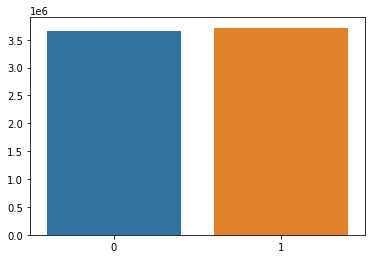

In [16]:
x = pd.value_counts(df_tr['target']).astype('int')
y = df_tr.target.unique()
sns.barplot(y,x.values)

Both the classes have almost same amount of datapoints.So our data is balanced

In [17]:
print('max length of the song in min in train:',df_tr['song_length'].max()/60000)
print('min length of the song in min in train:',df_tr['song_length'].min()/60000)

max length of the song in min in train: 180.86176666666665
min length of the song in min in train: 0.023216666666666667


In [18]:
print('max length of the song in min in test:',df_te['song_length'].max()/60000)
print('min length of the song in min in test:',df_te['song_length'].min()/60000)

max length of the song in min in test: 122.61528333333334
min length of the song in min in test: 0.024766666666666666


<AxesSubplot:xlabel='song_length', ylabel='Density'>

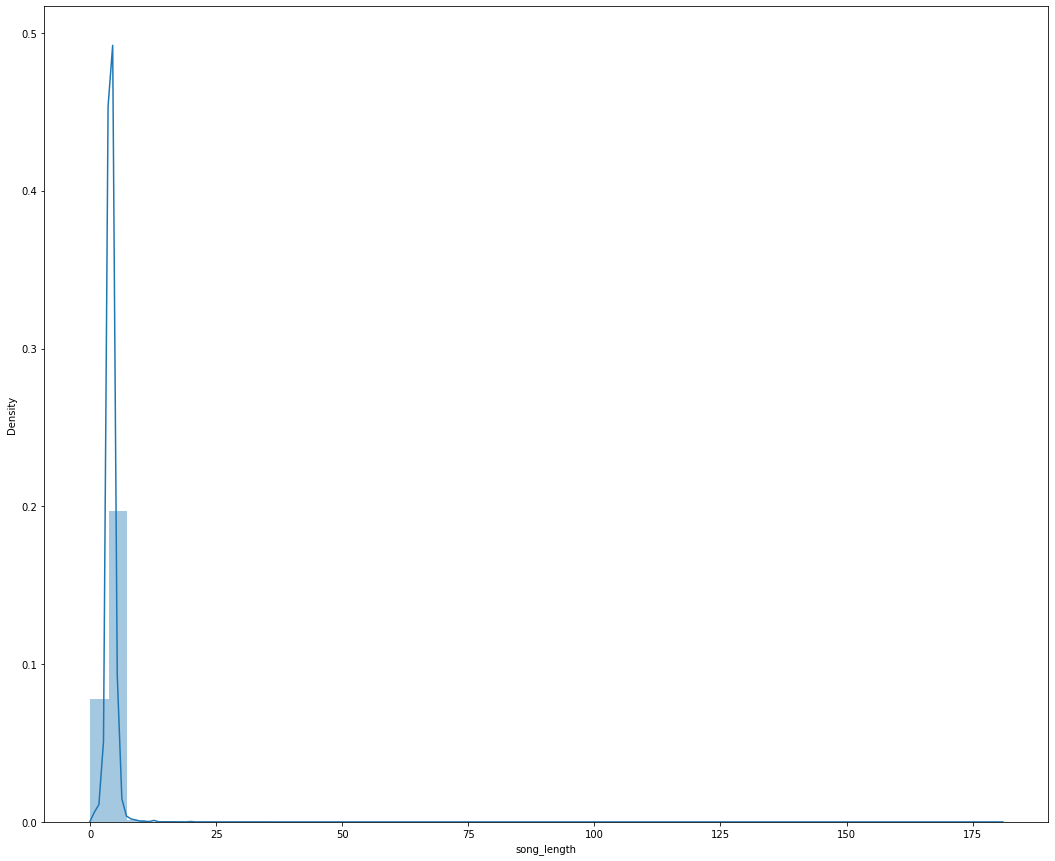

In [19]:
plt.figure(figsize = (18,15))
sns.distplot(df_tr['song_length']/ 60000, kde = True)

## Dealing with the missing values

In [20]:
# Checking for Nans in each feature
df_tr.isna().sum()/ len(df_tr)

msno                      0.000000
song_id                   0.000000
source_system_tab         0.003368
source_screen_name        0.056226
source_type               0.002920
target                    0.000000
song_length               0.000015
genre_ids                 0.016056
artist_name               0.000015
composer                  0.227140
lyricist                  0.430882
language                  0.000020
city                      0.000000
bd                        0.000000
gender                    0.401425
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
name                      0.000197
isrc                      0.078328
dtype: float64

In [21]:
df_te.isna().sum()/ len(df_te)

msno                      0.000000
song_id                   0.000000
source_system_tab         0.003302
source_screen_name        0.063706
source_type               0.002854
song_length               0.000010
genre_ids                 0.016470
artist_name               0.000010
composer                  0.242219
lyricist                  0.479016
language                  0.000016
city                      0.000000
bd                        0.000000
gender                    0.411541
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
name                      0.000304
isrc                      0.076910
dtype: float64

### Preprocessing features: source_system_tab

In [22]:
# This function fills the Nan values with specified fill value and removes punctuations from the labels
def preprocessing1(df, feature, fill_value):
    df[feature] = df[feature].fillna(value = fill_value)
    df[feature] = df[feature].astype('str').apply( lambda x: x.replace( '(','').replace( ')','').replace('-','').replace('|','_').replace('.', '').replace('/','').replace(' ','_').lower())

In [23]:
preprocessing1(df_tr, 'source_system_tab', 'no info')
df_tr['source_system_tab'].value_counts()

my_library      3684730
discover        2179252
search           623286
radio            476701
listen_with      212266
explore          167949
no_info           24849
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [24]:
preprocessing1(df_te, 'source_system_tab', 'no info')
df_te['source_system_tab'].value_counts()

my_library      1019492
discover         871068
search           277615
radio            212765
listen_with       98628
explore           66023
no_info            8442
notification       2124
settings            633
Name: source_system_tab, dtype: int64

### Preprocessing features : source_screen_name

In [25]:
# Treating Nan values as another category and
# filling nan values with a new category name 'no info'
preprocessing1(df_tr, 'source_screen_name', 'no info')
df_tr['source_screen_name'].value_counts()

local_playlist_more     3228202
online_playlist_more    1294689
radio                    474467
album_more               420156
no_info                  414804
search                   298487
artist_more              252429
discover_feature         244246
discover_chart           213658
others_profile_more      201795
discover_genre            82202
my_library                75980
explore                   72342
unknown                   54170
discover_new              15955
search_trends             13632
search_home               13482
my_library_search          6451
self_profile_more           212
concert                      47
payment                      12
Name: source_screen_name, dtype: int64

In [26]:
preprocessing1(df_te, 'source_screen_name', 'no info')
df_te['source_screen_name'].value_counts()

local_playlist_more     845115
online_playlist_more    529807
radio                   211201
album_more              176129
no_info                 162883
search                  121982
artist_more             110999
discover_feature         93401
others_profile_more      90457
discover_chart           78999
discover_genre           41617
explore                  27872
my_library               25559
unknown                  23620
discover_new              5277
search_trends             4883
search_home               4705
my_library_search         2114
self_profile_more          131
concert                     13
people_local                13
payment                     12
people_global                1
Name: source_screen_name, dtype: int64

### Preprocessing features: source_type

In [27]:
df_tr['source_type'].unique()

array(['online-playlist', 'local-playlist', 'local-library',
       'top-hits-for-artist', 'album', nan, 'song-based-playlist',
       'radio', 'song', 'listen-with', 'artist', 'topic-article-playlist',
       'my-daily-playlist'], dtype=object)

In [28]:
# Removing symbols and filling Nan values with 'unavailble'
preprocessing1(df_tr, 'source_type', 'unavailable')
df_tr['source_type'].value_counts()

locallibrary            2261399
onlineplaylist          1967924
localplaylist           1079503
radio                    483109
album                    477344
tophitsforartist         423614
song                     244722
songbasedplaylist        210527
listenwith               192842
unavailable               21539
topicarticleplaylist      11194
artist                     3038
mydailyplaylist             663
Name: source_type, dtype: int64

In [29]:
preprocessing1(df_te, 'source_type', 'unavailable')
df_te['source_type'].value_counts()

onlineplaylist          774532
locallibrary            582346
localplaylist           294537
radio                   215164
album                   195190
tophitsforartist        179360
song                    129153
songbasedplaylist        87179
listenwith               84499
unavailable               7297
topicarticleplaylist      5082
mydailyplaylist           2023
artist                     428
Name: source_type, dtype: int64

### Preprocessing features: song_length

In [30]:
# filling Nan with median value of training data
m = df_tr['song_length'].median()
df_tr['song_length'].fillna(value = m , inplace = True)
df_te['song_length'].fillna(value = m , inplace = True)
df_tr['song_length'].isna().sum(), df_te['song_length'].isna().sum()

(0, 0)

### Preprocessing features: genre_ids

In [31]:
df_tr['genre_ids'][10:20]

10        465
11        465
12        465
13        458
14    465|458
15        465
16        465
17        458
18        465
19        465
Name: genre_ids, dtype: object

In [32]:
df_tr['genre_ids'] = df_tr['genre_ids'].str.split('|').str[0]

In [33]:
df_tr['genre_ids'][14]

'465'

In [34]:
df_te['genre_ids'] = df_te['genre_ids'].str.split('|').str[0]

In [35]:
preprocessing1(df_tr, 'genre_ids', '000')
df_tr['genre_ids'].value_counts()

465     3814444
458     1266910
921      400596
1609     329134
444      280278
         ...   
779           1
1187          1
338           1
751           1
87            1
Name: genre_ids, Length: 159, dtype: int64

In [36]:
preprocessing1(df_te, 'genre_ids', '000')
df_te['genre_ids'].value_counts()

465     1248185
458      384869
921      210334
1609     121814
444       98690
         ...   
1089          1
677           1
1000          1
338           1
2192          1
Name: genre_ids, Length: 155, dtype: int64

### Preprocessing features:  artist_name

In [37]:
df_tr['artist_name'] [:-10]

0                 Bastille
1          Various Artists
2                      Nas
3                 Soundway
4              Brett Young
                ...       
7377403         Kesha|Zedd
7377404             Baauer
7377405    Various Artists
7377406             寶寶水晶音樂
7377407               AMIT
Name: artist_name, Length: 7377408, dtype: object

In [38]:
preprocessing1(df_tr, 'artist_name', 'no artist')
df_tr['artist_name'][:-10]

0                 bastille
1          various_artists
2                      nas
3                 soundway
4              brett_young
                ...       
7377403         kesha_zedd
7377404             baauer
7377405    various_artists
7377406             寶寶水晶音樂
7377407               amit
Name: artist_name, Length: 7377408, dtype: object

In [39]:
preprocessing1(df_te, 'artist_name', 'no artist')
df_te['artist_name'][:-10]

0          梁文音_rachel_liang
1                林俊傑_jj_lin
2          yu_takahashi_高橋優
3                        u2
4             yoga_mr_sound
                 ...       
2556775    暴君_bloody_tyrant
2556776      郭富城_aaron_kwok
2556777           berrygood
2556778     various_artists
2556779      彭佳慧_julia_peng
Name: artist_name, Length: 2556780, dtype: object

### Preprocessing features:  composer 

In [40]:
df_tr['composer'][7377405]

'Noah Feldshuh| Casey Harris| Sam Harris| A. Grant| Adam Levin'

In [41]:
preprocessing1(df_tr, 'composer', 'notavailable')
df_tr['composer'][:-10]

0                                       dan_smith__mark_crew
1                                               notavailable
2                           n_jones、w_adams、j_lordan、d_ingle
3                                              kwadwo_donkoh
4                    brett_young__kelly_archer__justin_ebach
                                 ...                        
7377403            anton_zaslavski__antonina_armato__t_price
7377404                                         notavailable
7377405    noah_feldshuh__casey_harris__sam_harris__a_gra...
7377406                                         notavailable
7377407                                            ai_li_shi
Name: composer, Length: 7377408, dtype: object

In [42]:
preprocessing1(df_te, 'composer', 'notavailable')
df_te['composer'][:-10]

0                                    qi_zheng_zhang
1                                               林俊傑
2                                      yu_takahashi
3          the_edge__adam_clayton__larry_mullen__jr
4                                       neuromancer
                             ...                   
2556775                                          暴君
2556776                                         金培達
2556777                                notavailable
2556778               ira_gershwin__george_gershwin
2556779                                         陳國華
Name: composer, Length: 2556780, dtype: object

In [43]:
df_tr['composer'].isna().sum()

0

### Preprocessing features:  lyricist

In [44]:
preprocessing1(df_tr, 'lyricist', 'notavailable')
df_tr['lyricist'][:-10]

0          notavailable
1          notavailable
2          notavailable
3          notavailable
4          notavailable
               ...     
7377403    notavailable
7377404    notavailable
7377405    notavailable
7377406    notavailable
7377407    notavailable
Name: lyricist, Length: 7377408, dtype: object

In [45]:
preprocessing1(df_te, 'lyricist', 'notavailable')
df_te['lyricist'][:-10]

0          notavailable
1                孫燕姿易家揚
2          yu_takahashi
3          notavailable
4          notavailable
               ...     
2556775              暴君
2556776              小美
2556777    notavailable
2556778    notavailable
2556779              娃娃
Name: lyricist, Length: 2556780, dtype: object

In [46]:
df_tr['lyricist'].value_counts()

notavailable                   3178798
阿信                              151301
方文山                             124108
姚若龍                              62190
周杰倫                              56235
                                ...   
許冠傑、黎彼得                              1
eric_clapton_stephen_bishop          1
eric_frederic_ammar_malick           1
sean_pang                            1
1sagain_donnie_j                     1
Name: lyricist, Length: 33551, dtype: int64

### Preprocessing features:  ISRC code

In [47]:
# Creating a new feature 'country' from isrc code
df_tr['country'] = df_tr['isrc'].str[:2]
df_te['country'] = df_te['isrc'].str[:2]
df_tr.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,country
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,explore,onlineplaylist,1,206471.0,359,bastille,dan_smith__mark_crew,...,52.0,1,0,NaN,7,2012-01-02,2017-10-05,Good Grief,GBUM71602854,GB
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my_library,local_playlist_more,localplaylist,1,284584.0,1259,various_artists,notavailable,...,52.0,13,24,female,9,2011-05-25,2017-09-11,Lords of Cardboard,US3C69910183,US


In [48]:
# Trying to fill NANs in Country based on the composer, artist_name, and language
df_tr[df_tr['isrc'].isna()]['language'].value_counts()

 3.0     282128
-1.0      83867
 10.0     73758
 31.0     69698
 52.0     56371
 17.0      9042
 24.0      2984
 45.0         1
Name: language, dtype: int64

In [49]:
df_tr[(df_tr['language'] == 52)]['country'].value_counts()

US    1095864
GB     351886
QM      56917
NO      33075
NL      31888
       ...   
MT          1
BK          1
GN          1
BZ          1
OM          1
Name: country, Length: 92, dtype: int64

In [50]:
def fillna_country(df2):
    b = df2[df2['country'].isna()]['language'].value_counts().axes[0]
    for l in b:
        c = df2[(df2['language'] == l )]['country'].value_counts().idxmax()
        df2.loc[df2.language == l, 'country'] = df2.loc[df2.language == l, 'country'].fillna(c)

In [51]:
fillna_country(df_tr)

In [52]:
def fillna_country_te(df1, df2):
        l2 = df2[df2['country'].isna()]['language'].value_counts().axes[0] # df2 -> test data
        l1 = df1['language'].value_counts().axes[0] #df1 -> train data
        for l in l2:
            if l in l1:
                c = df1[(df1['language'] == l )]['country'].value_counts().idxmax()
                df2.loc[df2.language == l, 'country'] = df2.loc[df2.language == l, 'country'].fillna(c)

In [53]:
df_te['country'].isna().sum()

196643

In [54]:
fillna_country_te(df_tr, df_te)

In [55]:
df_tr.loc[df_tr['country'].isna()]

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,country
1495189,oVF+gp+74GNUXrhGqVJgspRysUs0+BhwsPoXhrGSX50=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,search,album_more,album,1,241812.0,000,no_artist,notavailable,...,NaN,1,0,NaN,7,2014-09-29,2017-09-30,Rolled Away,NaN,NaN
1654622,vTGRIQUSebwNmihDIDQX9PE8XzXjX4rIqUcNUoSC7T8=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,radio,radio,radio,0,241812.0,000,no_artist,notavailable,...,NaN,13,34,male,9,2011-07-16,2017-06-12,Rolled Away,NaN,NaN
1892700,dM79FUPOVzvxmuMQ2V2PzqzXLDMAxyZ4ck3lqdrsWzE=,Lw4+I4zpBBSnuf5tsRsnU0ImYF4AlEPqsevLrZ0TeaE=,my_library,local_playlist_more,locallibrary,1,241812.0,000,no_artist,notavailable,...,NaN,11,36,female,9,2014-05-28,2017-10-30,Turbulences,NaN,NaN
2083961,fhUyUH3VMYWZpFcMsJ9DncoLhyHtuJJnIlHFTbrnnhc=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,my_library,local_playlist_more,localplaylist,0,241812.0,000,no_artist,notavailable,...,NaN,13,34,NaN,7,2011-03-03,2017-04-21,Rolled Away,NaN,NaN
2144593,43gzgDme9rf0iItrv6Zo2ICXMQywPdUwy0nc8J8Db4I=,7SYOSbXeBJXtkFYnLB8G+xAgmMcTAKjeMgS3Pk+1CHI=,my_library,local_playlist_more,locallibrary,1,241812.0,000,no_artist,notavailable,...,NaN,5,27,male,9,2011-01-18,2017-09-06,下輩子的眼淚,NaN,NaN
2362450,mIStkYsejaXuzPCw9z4Yx4KYW1EabrV/COqikpdV8Ag=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,my_library,no_info,localplaylist,1,241812.0,000,no_artist,notavailable,...,NaN,1,0,NaN,7,2011-12-26,2017-10-01,Rolled Away,NaN,NaN
4006355,OWle+lhgrJrnrca4OYyLx4wNdYUVSQysYCw0FTF9lOw=,Lw4+I4zpBBSnuf5tsRsnU0ImYF4AlEPqsevLrZ0TeaE=,search,album_more,album,0,241812.0,000,no_artist,notavailable,...,NaN,22,26,male,9,2008-08-16,2017-10-06,Turbulences,NaN,NaN
5943182,+bQQ3svrSTHzIVdE8VA6yAAIBNF+WEXmp4WsI1cM8cw=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,radio,radio,radio,0,241812.0,000,no_artist,notavailable,...,NaN,5,36,male,7,2010-10-23,2017-09-23,Rolled Away,NaN,NaN
6794433,6esVRMr1v1qQT1tR7NWP7LaTAWCd32aWU91fKmLcWgk=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,search,search,album,1,241812.0,000,no_artist,notavailable,...,NaN,6,32,female,7,2011-04-15,2017-09-14,Rolled Away,NaN,NaN


In [56]:
# Droping these 9 rows as the other columns were also mostly NANs previously 
df_tr.drop(df_tr.index[df_tr['country'].isna()], inplace = True)
df_tr.shape

(7377409, 21)

In [57]:
df_te.loc[df_te['country'].isna()]

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,country
589260,7ZXkc5u72qDQE8dqQVIaxCfTGEPDF1Ak8R+YWkzl6jI=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,discover,album_more,album,241812.0,000,no_artist,notavailable,notavailable,NaN,14,39,male,9,2012-01-08,2019-12-07,Rolled Away,NaN,NaN
1446239,5Eq0bbVF1Yh/tuFHWMeZ9Kutfz9Wj5baNwrlaZ0Vgrs=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,radio,radio,radio,241812.0,000,no_artist,notavailable,notavailable,NaN,1,0,NaN,7,2013-12-05,2017-04-09,Rolled Away,NaN,NaN
1666131,dJfBnXVe8IXAVfsgqAKxuoQ2pw8saislr4pG4aqaESk=,GQK/aYFW8elL+4o7Qo1zNSQmjYDKJfacYT2+QKWQ71U=,my_library,local_playlist_more,localplaylist,241812.0,000,no_artist,notavailable,notavailable,NaN,8,26,male,9,2006-10-06,2017-11-30,Doctor Gradus Ad Parnassum (Debussy),NaN,NaN


In [58]:
df_te.loc[df_te.index[df_te['country'].isna()], 'country'] = 'US'
df_te.shape

(2556790, 20)

### Preprocessing features: language

In [59]:
df_tr[df_tr['language'].isna()][ 'composer'].value_counts()
# Composer column for NANs in language specifies 36 of those songs contain korean lyrics

notavailable                                                                                                                                                                                                                                                                                                                                                   105
korean_lyrics_by_kim__jong_hyun__lee__yoon_seol_ryu__da_som_jeong__young_ah__henrik_meinke__jonas_kalisch__alexsej_vlasenko__jeremy_chacon__ilanguaq_lumholt___marcus_winther,korean_lyrics_by_kim__jong_hyun__lee__yoon_seol_ryu__da_som_jeong__young_ah__henrik_meinke__jonas_kalisch__alexsej_vlasenko__jeremy_chacon__ilanguaq_lumholt___marcus_winther     36
Name: composer, dtype: int64

In [60]:
# Findingthe indexes where composer contains the word korean
x = df_tr.loc[(df_tr['language'].isna()) & (df_tr['composer'].str.find('korean') != -1)].index.tolist()

In [61]:
# replacing the Nans for the indexes above with language 31 as it is promonent in Korea
for i in x:
    df_tr['language'][i] = 31

In [62]:
df_tr[df_tr['language'].isna()][ 'composer'].value_counts()

notavailable    105
Name: composer, dtype: int64

##### Similarly for the test set

In [63]:
df_te[df_te['language'].isna()][ 'composer'].value_counts()

notavailable                                                                                                                                                                                                                                                                                                                                                   25
korean_lyrics_by_kim__jong_hyun__lee__yoon_seol_ryu__da_som_jeong__young_ah__henrik_meinke__jonas_kalisch__alexsej_vlasenko__jeremy_chacon__ilanguaq_lumholt___marcus_winther,korean_lyrics_by_kim__jong_hyun__lee__yoon_seol_ryu__da_som_jeong__young_ah__henrik_meinke__jonas_kalisch__alexsej_vlasenko__jeremy_chacon__ilanguaq_lumholt___marcus_winther    17
Name: composer, dtype: int64

In [64]:
x2 = df_te.loc[(df_te['language'].isna()) & (df_te['composer'].str.find('korean') != -1)].index.tolist()
for i in x2:
    df_te['language'][i] = 31
df_te[df_te['language'].isna()][ 'composer'].value_counts()

notavailable    25
Name: composer, dtype: int64

In [65]:
df_tr[df_tr['language'].isna()][ 'country'].value_counts()

US    40
FR    16
TW    13
JP    11
HK     9
TC     4
IT     3
DE     3
GB     3
CA     1
PL     1
QM     1
Name: country, dtype: int64

In [66]:
# Getting the dominant language for each country
country = df_tr['country'].unique()
dict_cntry = {}
for c in country:
    l = df_tr[(df_tr['country'] == c )]['language'].value_counts().idxmax()
    dict_cntry.update({c:l})

In [67]:
index_na = df_tr[df_tr['language'].isna()].index.tolist()

In [68]:
for i in index_na:
    for c in dict_cntry.keys():
        if df_tr['country'][i] == c :
            df_tr['language'][i] = dict_cntry.get(c)                                                     

In [69]:
df_tr['language'].isna().sum()

0

In [70]:
index_na_te = df_te[df_te['language'].isna()].index.tolist()
for i in index_na_te:
    for c in dict_cntry.keys():
        if df_te['country'][i] == c :
            df_te['language'][i] = dict_cntry.get(c) 
df_te['language'].isna().sum()

0

### Preprocessing features: Gender

In [71]:
df_te['gender'].value_counts()

male      768452
female    736114
Name: gender, dtype: int64

In [72]:
df_tr['gender'].isna().sum()

2961476

In [73]:
preprocessing1(df_tr, 'gender', 'no info')
df_tr['gender'].isna().sum()

0

In [74]:
preprocessing1(df_te, 'gender', 'no info')
df_te['gender'].isna().sum()

0

### Preprocessing and extracting new features: registration_init_time , expiration_date

In [75]:
df_tr['membership_days'] = df_tr['expiration_date'].subtract(df_tr['registration_init_time']).dt.days.astype(int)
df_te['membership_days'] = df_te['expiration_date'].subtract(df_te['registration_init_time']).dt.days.astype(int)

In [76]:
df_tr['registration_year'] = df_tr['registration_init_time'].dt.year
df_tr['registration_month'] = df_tr['registration_init_time'].dt.month
df_tr['registration_date'] = df_tr['registration_init_time'].dt.day

In [77]:
df_te['registration_year'] = df_te['registration_init_time'].dt.year
df_te['registration_month'] = df_te['registration_init_time'].dt.month
df_te['registration_date'] = df_te['registration_init_time'].dt.day

In [78]:
df_tr['expiration_year'] = df_tr['expiration_date'].dt.year
df_tr['expiration_month'] = df_tr['expiration_date'].dt.month
df_tr['expiration_date'] = df_tr['expiration_date'].dt.day

In [79]:
df_te['expiration_year'] = df_te['expiration_date'].dt.year
df_te['expiration_month'] = df_te['expiration_date'].dt.month
df_te['expiration_date'] = df_te['expiration_date'].dt.day

In [80]:
df_tr = df_tr.drop(['registration_init_time','expiration_date'], axis=1)
df_te = df_te.drop(['registration_init_time','expiration_date'], axis=1)

### Preprocessing and extracting new features: Song_year from ISRC code

In [81]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return -1

In [82]:
df_tr['song_year'] = df_tr['isrc'].apply(isrc_to_year)

In [83]:
df_tr['song_year'].value_counts()

 2016    2021257
 2015     831867
 2014     599984
-1        577849
 2012     407602
          ...   
 1940         29
 1945         21
 1944         13
 1948          8
 1943          2
Name: song_year, Length: 101, dtype: int64

In [84]:
df_te['song_year'] = df_te['isrc'].apply(isrc_to_year)

In [85]:
# Filling NANs with median of years corresponding to each country
country = df_tr['country'].unique()
dict_year = {}
for c in country:
    year = df_tr[df_tr['country'] == c]['song_year'].median()
    dict_year.update({c:year})

In [86]:
index_year_tr = df_tr[df_tr['song_year'] == -1].index.tolist()
for i in index_year_tr:
    for c in dict_year.keys():
        if df_tr['country'][i] == c :
            df_tr['song_year'][i] = dict_year.get(c) 

In [87]:
index_year_te = df_te[df_te['song_year'] == -1].index.tolist()
for i in index_year_te:
    for c in dict_year.keys():
        if df_te['country'][i] == c :
            df_te['song_year'][i] = dict_year.get(c)

In [88]:
df_tr = df_tr.drop(['isrc'], axis=1)
df_te = df_te.drop(['isrc'], axis=1)

In [89]:
df_tr = df_tr.drop(['Unnamed: 0'], axis=1)
df_te = df_te.drop(['Unnamed: 0'], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

### Preprocessing feature: name

In [90]:
df_tr.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'name', 'country', 'membership_days',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month', 'song_year'],
      dtype='object')

In [92]:
df_tr.isnull().sum()

msno                     0
song_id                  0
source_system_tab        0
source_screen_name       0
source_type              0
target                   0
song_length              0
genre_ids                0
artist_name              0
composer                 0
lyricist                 0
language                 0
city                     0
bd                       0
gender                   0
registered_via           0
name                  1457
country                  0
membership_days          0
registration_year        0
registration_month       0
registration_date        0
expiration_year          0
expiration_month         0
song_year                0
dtype: int64

In [ ]:
df_tr['name'][:10]

In [95]:
df_tr.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
city                  0
bd                    0
gender                0
registered_via        0
name                  0
country               0
membership_days       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_year             0
dtype: int64

In [94]:
df_tr.to_csv('Train_prep1.csv')
df_te.to_csv('Test_prep1.csv')

In [109]:
df_tr = pd.read_csv('Train_prep1.csv')
df_te = pd.read_csv('Test_prep1.csv')

In [110]:
df_tr.isna().sum()

Unnamed: 0            0
Unnamed: 0.1          0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
city                  0
bd                    0
gender                0
registered_via        0
name                  0
country               0
membership_days       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_year             0
dtype: int64

In [114]:
df_tr['composer'].fillna('notavailable', inplace = True)
df_te['composer'].fillna('notavailable', inplace = True)

In [115]:
df_tr['lyricist'].fillna('notavailable', inplace = True)
df_te['lyricist'].fillna('notavailable', inplace = True)


In [116]:
df_tr['name'].fillna('notavailable', inplace = True)
df_te['name'].fillna('notavailable', inplace = True)

In [117]:
df_tr.to_csv('Train_prep1.csv')
df_te.to_csv('Test_prep1.csv')

In [106]:
df_tr.isna().sum()

Unnamed: 0            0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
city                  0
bd                    0
gender                0
registered_via        0
name                  6
country               0
membership_days       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_year             0
dtype: int64